**目录**：
- [1.介绍](#介绍)
- [2.基本符号](#基本符号)
- [3.表达式](#表达式)
- [4.计算](#计算)
- [5.方程和图像](#方程和图像)

# 介绍

SymPy 是一个符号计算库，它实现了一套计算机代数系统（CAS）。通过声明符号、表达式等，可以实现各种数学式的推导和计算，支持多项式、微积分、矩阵、方程等多种功能

<img src="https://docs.sympy.org/latest/_static/sympylogo.png" style="zoom:30%;" />

官方文档网址在 https://docs.sympy.org/latest/index.html

要安装 SymPy，只需要使用 `conda install sympy` 或者 `pip install sympy`，然后 `import sympy` 即可

与数值计算不同，符号可以更准确地表达各种数学关系。下面以符号计算的 sympy 库对比数值计算的 math 库为例，展示二者的区别

In [1]:
import sympy
import math
from IPython.display import display

首先使用 math 库，打印 $\pi$ 的值和 $\sin(\pi)$ 的值

In [2]:
print(math.pi)
print(math.sin(math.pi))

3.141592653589793
1.2246467991473532e-16


打印出的结果是一定精度下的浮点数

正是由于精度问题，计算出来的 $\sin(\pi)$ 和真实值可能会存在一定的误差

然后使用 sympy 库来进行打印

In [3]:
print(sympy.pi)
print(sympy.sin(sympy.pi))

pi
0


打印的 $\pi$ 值会以符号的形式展示出来

并且通过符号计算的方式能够得到真实值 $\sin(\pi)=0$

此外，sympy 库的输出对 IPython 的支持比较好，在 Jupytrer Notebook 进行打印时，能直接显示 $\pi$ 的符号

In [4]:
display(sympy.pi)

pi

下面再以 $\sqrt 2$ 为例展示一下符号计算的特点

使用 math 库计算根号时，会按照浮点数的方式以一定精度输出

而 sympy 库的根号，则是按照符号方式来进行输出

In [5]:
math.sqrt(2)

1.4142135623730951

In [6]:
sympy.sqrt(2)

sqrt(2)

# 基本符号

为了简洁和方便，下面使用 `import *` 的方式来导入 sympy 模块，在调用方法前就可以省略 sympy. 了

In [2]:
from sympy import *

在数学公式中使用符号前，需要从 `symbols` 方法导入英文字母和希腊字母

In [8]:
x = symbols('x')
x

x

支持同时导入多个字母，每个字母同变量名按顺序对应

In [4]:
a, b, x, y = symbols('a b x y')
alp, lam = symbols('alpha lamda')

In [9]:
display(a,b,x,y)
display(alp,lam)

a

b

x

y

alpha

lamda

# 表达式

sympy 支持多种数学运算的表达式，并且可以对表达式进行化简、展开等不同的变形，从而实现数学推导

下面以多项式和三角函数为例子

In [11]:
x, y, z = symbols('x y z')

## 多项式的因式分解

首先我们定义一个表达式 $3x^2y+15x^2+y+5$，并命名为 expr

定义表达式只需要在等号后面书写数学表达式即可，其中幂需要用 ** 来表示，而不是 ^

使用 `factor` 对表达式进行因式分解，整理成我们想要的形式

In [12]:
expr = 3*x**2*y + 15*x**2 + y + 5
display(expr)
display(expr.factor())

3*x**2*y + 15*x**2 + y + 5

(3*x**2 + 1)*(y + 5)

## 多项式的展开

我们再以 x 和 z 两个变量书写一个表达式

使用 `expand`，将多项式进行展开

使用 `collect`，将多项式整理成 $z$ 的幂的形式

In [13]:
expr = (2*x + 3 + 1/z)**3
display(expr)
display(expr.expand())
display(collect(expr.expand(), z))

(2*x + 3 + 1/z)**3

8*x**3 + 36*x**2 + 12*x**2/z + 54*x + 36*x/z + 6*x/z**2 + 27 + 27/z + 9/z**2 + z**(-3)

8*x**3 + 36*x**2 + 54*x + 27 + (12*x**2 + 36*x + 27)/z + (6*x + 9)/z**2 + z**(-3)

## 三角函数的化简

除了多项式的 `factor`, `expand`, `collect` 等方法以外，不同类型的表达式会有不同的变形方法

而 `simplify` 则是对各种表达式都通用的一种自动化简方法

下面以三角函数的化简为例子

In [14]:
expr = sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4
display(expr)
display(simplify(expr))

sin(x)**4 - 2*sin(x)**2*cos(x)**2 + cos(x)**4

cos(4*x)/2 + 1/2

# 计算

除了对表达式的变形以外，sympy 可以计算表达式的结果，并且支持微积分等复杂的运算方法

## 多项式的计算

在前面我们已经了解了表达式的定义

接下来首先声明一个多项式

In [15]:
expr = 3*x**2*y + 15*x**2 + y + 5
expr

3*x**2*y + 15*x**2 + y + 5

要进行计算，则使用 `subs` 方法，将多项式里的符号替换为具体的数值

如果赋值 $x=2$，会将 $x$ 替换掉，原式变成了 $y$ 的表达式

如果赋值 $x=2,y=3$，则会将得到计算的数值结果

In [16]:
display(expr.subs([(x, 2)]))
display(expr.subs([(x, 2), (y, 3)]))

13*y + 65

104

## 极限的计算

我们首先声明一个 $\frac{\sin(x)}{x}$ 的表达式

In [17]:
expr = sin(x)/x

 使用大写的 `Limit`，可以列出 $x\rightarrow 0$ 时的极限表达式
 
 而使用小写的 `limit`，则会对极限进行计算，得到结果
 
 需要有方向符号 '-'/'+'/'+-' 来指定左极限或右极限，默认为 '+'

In [18]:
display(expr)
display(Limit(expr, x, 0, '+-'))
display(limit(expr, x, 0))

sin(x)/x

Limit(sin(x)/x, x, 0, dir='+-')

1

In [19]:
display(1/x)
display(limit(1/x, x, 0, '-'))
display(limit(1/x, x, 0, '+'))

1/x

-oo

oo

## 微分的计算

我们首先声明一个 $2x+\log(x^2+1)$ 的表达式

In [20]:
expr = log(x**2 + 1) + 2 * x

使用 `diff`，对导数进行计算

在表达式后面指定求导的符号和次数

In [21]:
display(expr)
display(diff(expr))
display(diff(expr, x, x))
display(diff(expr, x, 3))

2*x + log(x**2 + 1)

2*x/(x**2 + 1) + 2

2*(-2*x**2/(x**2 + 1) + 1)/(x**2 + 1)

4*x*(4*x**2/(x**2 + 1) - 3)/(x**2 + 1)**2

在多元函数中，结合多个符号指定偏导数

In [22]:
display(x**3*y**3)
display(diff(x**3*y**3, x, y))
display(diff(x**3*y**3, y, 2))

x**3*y**3

9*x**2*y**2

6*x**3*y

## 积分的计算

我们首先定义一个 $\sin(x)$ 的表达式

In [23]:
expr = sin(x)

使用 `integrate`，计算积分的结果

除了不定积分，还可以指定范围，计算定积分

In [24]:
display(expr)
display(integrate(expr))
display(integrate(expr, (x, 0, pi)))

sin(x)

-cos(x)

2

# 方程和图像

sympy 还支持多元一次方程、线性/非线性方程组、微分方程等求解，并且可以通过画图展示函数的图像

首先定义两个表达式 $2x+y$ 和 $2y-x-5$

使用 `solve` 方法来求多元一次方程的解

In [25]:
expr1 = 2*x + y
expr2 = 2*y - x - 5
solve([expr1, expr2], (x, y))

{x: -1, y: 2}

使用 `plot` 画出一元二次方程的图像，`solve` 来求解

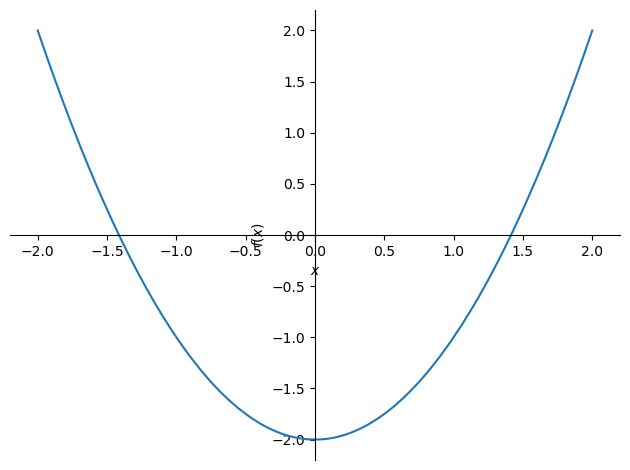

In [26]:
init_printing()
display(solve(expr))

import matplotlib
%matplotlib inline
expr = x**2 - 2 
plot(expr, (x, -2, 2))

## 矩阵

sympy 还支持矩阵的变形和计算等操作，支持线性代数的计算

首先构造一个矩阵

In [27]:
mat = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
mat

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

将矩阵进行转置

In [28]:
mat.T

⎡3   5   5   5 ⎤
⎢              ⎥
⎢-2  3   -2  -2⎥
⎢              ⎥
⎢4   -3  2   -3⎥
⎢              ⎥
⎣-2  -2  -2  3 ⎦

计算矩阵的行列式

In [29]:
mat.det()

计算矩阵的特征值和特征向量

在这个例子中，一共有 -2,3,5 三个特征值，其中特征值 5 对应了 2 个特征向量

In [30]:
init_printing(use_unicode=True)
mat.eigenvects()

⎡⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜-2, 1, ⎢⎢ ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟, ⎜5, 2, ⎢⎢ ⎥, ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

除此以外，sympy 还支持矩阵的上三角化、对角化、加减、幂等操作，这里不做过多展示